# TS3: Análisis de Fourier: FFT, desparramo, interpolación y ventaneo.

## Alumno: Felipe Berganza

# RESUMEN

En el TS3 analizaremos la Transformada Rápida de Fourier (FFT) de una senal senoidal viendo asi el desaparramo espectral que genera dicho efecto de calcularla.


# INTRODUCCION 

## Transformada Rápida de Fourier (FFT) 

es un algoritmo que permite calcular de forma eficiente la Transformada Discreta de Fourier (DFT) de una señal digital.Convierte una señal del dominio del tiempo  al dominio de la frecuencia y asi poder analizar mejor que frecuencia  predomina en la senal y su analisis espectral.

## Desparramo Espectral 

Ocurre cuando una señal no es periódica en la ventana de análisis. Genera energía fuera de las frecuencias reales, “ensuciando” el espectro.

## Interpolacion Espectral 

Técnica para estimar con mayor precisión la frecuencia de componentes entre bins de la FFT. Mejora la resolución sin aumentar el tamaño de la FFT.

## Ventaneo 

Aplicar una ventana (como Hamming o Hann) antes de la FFT reduce el desparramo. Atenúa los bordes de la señal para mejorar la representación espectral.


# CONSIGNA 1 

Senoidal de frecuencia f0=k0∗fS   /   N=k0.Δf

potencia normalizada, es decir energía (o varianza) unitaria
Se pide:

a) Sea k0:

-N4
 
-N4+0.25
 
-N4+0.5
 
Notar que a cada senoidal se le agrega una pequeña desintonía respecto a  Δf. Graficar las tres densidades espectrales de potencia (PDS's) y discutir cuál es el efecto de dicha desintonía en el espectro visualizado.

## DEFINO SENAL A ANALIZAR Y PARAMETROS 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy.fft import fft



def sen(ff, nn, amp=1, dc=0, ph=0, fs=2):
    N = np.arange(nn)
    t = N/fs
    x = dc + amp * np.sin(2 * np.pi * ff * t + ph)
    return t, x


# Parámetros
N = 1000
fs = N
df = fs / N
amp_unit = np.sqrt(2 / N)  # Amplitud para energía unitaria

# Frecuencias
k0_1 = N / 4
k0_2 = N / 4 + 0.25
k0_3 = N / 4 + 0.5

f0_1 = k0_1 * df
f0_2 = k0_2 * df
f0_3 = k0_3 * df

## GENERO LAS SENALES 

In [2]:
# Generar señales
t1, x1 = sen(ff=f0_1, nn=N, amp=amp_unit, fs=fs)
t2, x2 = sen(ff=f0_2, nn=N, amp=amp_unit, fs=fs)
t3, x3 = sen(ff=f0_3, nn=N, amp=amp_unit, fs=fs)

## CALCULO FFTS Y PSDS


In [3]:
# FFTs
X1 = fft(x1)
X2 = fft(x2)
X3 = fft(x3)

# PSDs
PSD1 = (np.abs(X1)**2) / N
PSD2 = (np.abs(X2)**2) / N
PSD3 = (np.abs(X3)**2) / N

## GRAFICO PARA POSTERIOR ANALISIS 

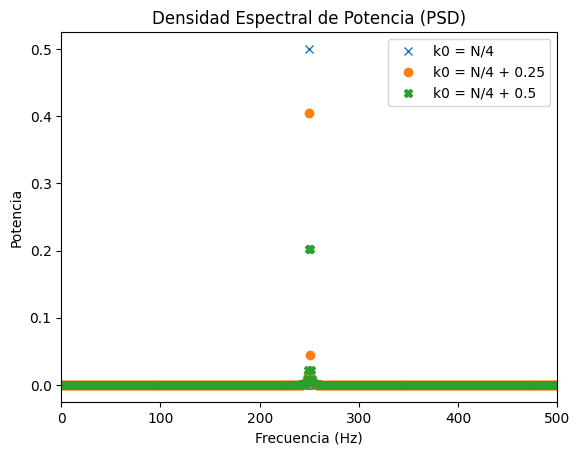

In [4]:
freqs = np.arange(N) * df

# Gráfico
plt.figure()
plt.plot(freqs, PSD1, 'x', label='k0 = N/4')
plt.plot(freqs, PSD2, 'o', label='k0 = N/4 + 0.25')
plt.plot(freqs, PSD3, 'X', label='k0 = N/4 + 0.5')
plt.xlim([0, fs/2])
plt.title('Densidad Espectral de Potencia (PSD)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.legend()
plt.show()

Se generaron tres señales senoidales con frecuencia cercana  de la FFT (k₀ = N/4, N/4+0.25 y N/4+0.5), todas con energía unitaria. Al aplicar la FFT y calcular la Densidad Espectral de Potencia (PSD), se observó lo siguiente:
- La señal con frecuencia exactamente  (k₀ = N/4) mostró un espectro limpio y concentrado, sin desparramo.
- Las señales con frecuencias no alineadas  (k₀ + 0.25 y k₀ + 0.5) presentaron desparramo espectral, evidenciado por la dispersión de energía en múltiples bins.

Este experimento demuestra cómo la alineación de la frecuencia  de la FFT afecta la precisión espectral, y destaca la importancia del ventaneo o interpolación para mejorar la resolución en casos no ideales.

## CONSIGNA 2 

Verificar la potencia unitaria de cada PSD, puede usar la identidad de Parseval. En base a la teoría estudiada. Discuta la razón por la cual una señal senoidal tiene un espectro tan diferente respecto a otra de muy pocos Hertz de diferencia. 


In [5]:
# Verificación de Parseval
energia_x1 = np.sum(x1**2)
energia_X1 = np.sum(np.abs(X1)**2) / N

energia_x2 = np.sum(x2**2)
energia_X2 = np.sum(np.abs(X2)**2) / N

energia_x3 = np.sum(x3**2)
energia_X3 = np.sum(np.abs(X3)**2) / N

print("🔍 Verificación de Parseval:")
print(f"x1: Tiempo = {energia_x1:.4f}, Frecuencia = {energia_X1:.4f}")
print(f"x2: Tiempo = {energia_x2:.4f}, Frecuencia = {energia_X2:.4f}")
print(f"x3: Tiempo = {energia_x3:.4f}, Frecuencia = {energia_X3:.4f}")


🔍 Verificación de Parseval:
x1: Tiempo = 1.0000, Frecuencia = 1.0000
x2: Tiempo = 0.9990, Frecuencia = 0.9990
x3: Tiempo = 1.0000, Frecuencia = 1.0000


- Esto demuestra que la FFT conserva la energía total de la señal, independientemente de su frecuencia.
Esta verificación es fundamental para validar la correcta implementación de la FFT y garantiza que el análisis espectral refleja fielmente el contenido energético de las señales originales.


## CONSIGNA 2 

 Repetir el experimento mediante la técnica de zero padding. Dicha técnica consiste en agregar ceros al final de la señal para aumentar Δf
 de forma ficticia. Probar agregando un vector de 9*N ceros al final. Discuta los resultados obtenidos.

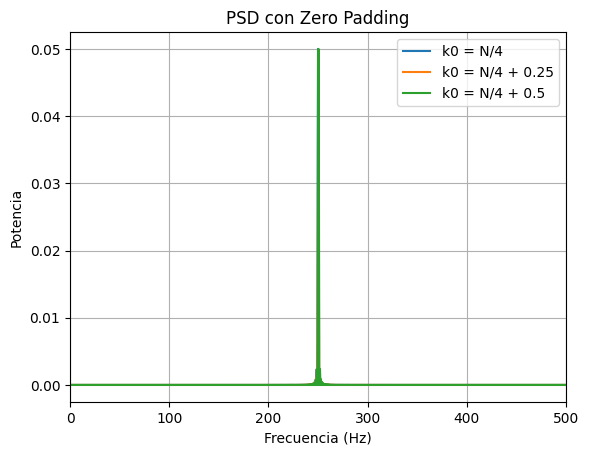

In [6]:
# Zero padding: agregar 9*N ceros
zeros = np.zeros(9 * N)

x1_zp = np.concatenate([x1, zeros])
x2_zp = np.concatenate([x2, zeros])
x3_zp = np.concatenate([x3, zeros])

N_zp = len(x1_zp)
df_zp = fs / N_zp
freqs_zp = np.arange(N_zp) * df_zp

# FFTs con zero padding
X1_zp = fft(x1_zp)
X2_zp = fft(x2_zp)
X3_zp = fft(x3_zp)

# PSDs con zero padding
PSD1_zp = (np.abs(X1_zp)**2) / N_zp
PSD2_zp = (np.abs(X2_zp)**2) / N_zp
PSD3_zp = (np.abs(X3_zp)**2) / N_zp

# Gráfico
plt.figure()
plt.plot(freqs_zp, PSD1_zp, label='k0 = N/4')
plt.plot(freqs_zp, PSD2_zp, label='k0 = N/4 + 0.25')
plt.plot(freqs_zp, PSD3_zp, label='k0 = N/4 + 0.5')
plt.xlim([0, fs/2])
plt.title('PSD con Zero Padding')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.legend()
plt.grid(True)
plt.show()

La aplicación de zero padding (agregar 9×N ceros) a las señales permitió aumentar la resolución en el dominio de la frecuencia sin modificar el contenido espectral original. Esto se refleja en los siguientes puntos:
- Se incrementó el número de muestras en la FFT, lo que redujo el espaciamiento entre frecuencias (\Delta f), permitiendo una visualización más detallada del espectro.
- Las señales con frecuencia no alineada  (k₀ + 0.25 y k₀ + 0.5) mostraron un perfil espectral más suave y definido, facilitando la identificación precisa de la frecuencia dominante.
- Aunque el zero padding no mejora la resolución espectral real, sí mejora la interpolación visual del espectro, lo que es útil para análisis y presentación de resultados.
Este procedimiento es especialmente útil cuando se desea estimar frecuencias inter-bin o mejorar la estética y claridad de los gráficos espectrales.
